Эпоха: 1
Эпоха: 2
Эпоха: 3
Эпоха: 4
Эпоха: 5
Эпоха: 6
Эпоха: 7
Эпоха: 8
Эпоха: 9
Эпоха: 10
Acc: 91.1


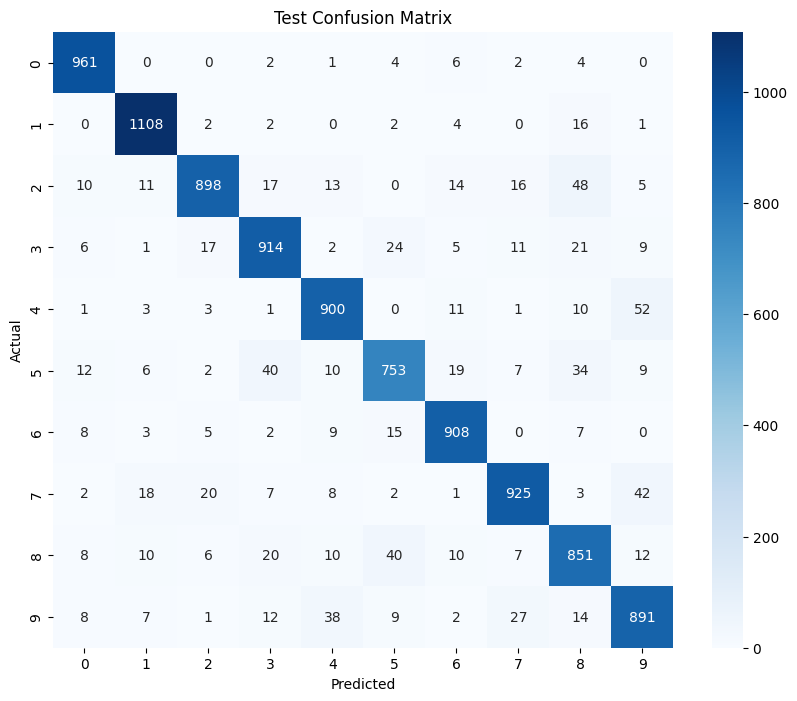

In [10]:
#
# Verify Reading Dataset via MnistDataloader class
#
from perceptron import Perceptron
import random
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import struct
from array import array
from os.path  import join
from MnistReader import MnistDataloader

#
# Set file paths based on added MNIST Datasets
#
input_path = 'data'
training_images_filepath = join(input_path, 'train-images-idx3-ubyte/train-images-idx3-ubyte')
training_labels_filepath = join(input_path, 'train-labels-idx1-ubyte/train-labels-idx1-ubyte')
test_images_filepath = join(input_path, 't10k-images-idx3-ubyte/t10k-images-idx3-ubyte')
test_labels_filepath = join(input_path, 't10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte')

#
# Helper function to show a list of images with their relating titles
#
def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30,20))
    index = 1    
    for x in zip(images, title_texts):        
        image = x[0]        
        title_text = x[1]
        plt.subplot(rows, cols, index)        
        plt.imshow(image, cmap=plt.cm.gray)
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);        
        index += 1

#
# Load MINST dataset
#
mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()

#
# Show some random training and test images 
#
images_2_show = []
titles_2_show = []
for i in range(0, 10):
    r = random.randint(1, 60000)
    images_2_show.append(x_train[r])
    titles_2_show.append('training image [' + str(r) + '] = ' + str(y_train[r]))    

for i in range(0, 5):
    r = random.randint(1, 10000)
    images_2_show.append(x_test[r])        
    titles_2_show.append('test image [' + str(r) + '] = ' + str(y_test[r]))    

#show_images(images_2_show, titles_2_show)
last_test = x_test[-1]
last_label = y_test[-1]

x_train = np.array(x_train)
y_train = np.array(y_train) 
x_test = np.array(x_test)[:-1]
y_test = np.array(y_test)[:-1]


class_count = 10

if class_count == 2:
    mask = (y_train == 1) | (y_train == 0)
    x_train = x_train[mask]
    y_train = y_train[mask]

    mask = (y_test == 1) | (y_test == 0)
    x_test = x_test[mask]
    y_test = y_test[mask]

seed = 10
iterations_number = 10
learning_rate = 0.001
p = Perceptron(10)
p.load_dataset(x_train, y_train, x_test, y_test)
p.init_weights(in_count=784, class_count=class_count)
w1, _ = p.fit(learning_rate=learning_rate, iterations_number=iterations_number)
accuracy, confusion_matrix_test = p.predict(class_count=class_count)
print(f'Acc: {accuracy}')

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix_test, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Test Confusion Matrix')
plt.show()

interactive(children=(IntSlider(value=0, description='Номер эпохи', max=9), IntSlider(value=0, description='Но…

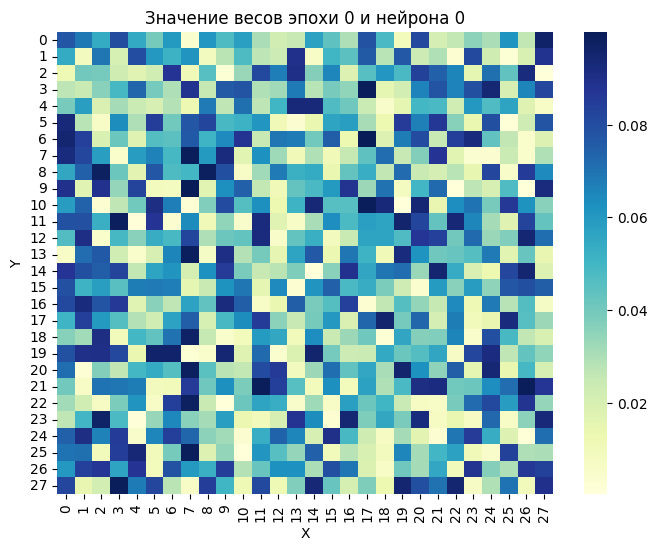

In [11]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets
from IPython.display import display

# Создайте случайную матрицу для тепловой карты
weights = p.get_log_weights()

# Создайте функцию для отображения тепловой карты
def plot_heatmap(selected_row, selected_row2):
    plt.figure(figsize=(8, 6))
    arr = weights[selected_row]
    sns.heatmap(arr[:-1,selected_row2].reshape(28,28), cmap='YlGnBu')
    plt.title(f'Значение весов эпохи {selected_row} и нейрона {selected_row2}')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

# Создайте слайдер
row_slider = widgets.IntSlider(value=0, min=0, max=iterations_number-1, description="Номер эпохи")
row_slider2 = widgets.IntSlider(value=0, min=0, max=class_count - 1, description="Номер нейрона")
# Use interact to link the slider and update function
interact(plot_heatmap, selected_row=row_slider, selected_row2=row_slider2)

# Отобразите тепловую карту с начальным значением слайдера
plot_heatmap(0, 0)


In [12]:
def algo(learning_rate=None, iterations_number=None, cross_entropy=None):
    p = Perceptron(10)
    p.load_dataset(x_train, y_train, x_test, y_test)
    p.init_weights(class_count=class_count)
    w1, _ = p.fit(learning_rate=learning_rate, iterations_number=iterations_number)
    accuracy, matrix = p.predict(class_count=class_count)
    return accuracy, matrix

acc_1 = []
for learning_rate in [0.0001, 0.001, 0.01, 0.1, 1]:
    accuracy, matrix = algo(learning_rate=learning_rate, iterations_number=5)
    print()
    acc_1.append((accuracy, matrix, learning_rate))

Эпоха: 1
Эпоха: 2
Эпоха: 3
Эпоха: 4
Эпоха: 5

Эпоха: 1
Эпоха: 2
Эпоха: 3
Эпоха: 4
Эпоха: 5

Эпоха: 1
Эпоха: 2
Эпоха: 3
Эпоха: 4
Эпоха: 5

Эпоха: 1
Эпоха: 2
Эпоха: 3
Эпоха: 4
Эпоха: 5



/home/dmitry/a/Вуз/Нейронки/lab2/perceptron.py:42: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-v))


Эпоха: 1
Эпоха: 2
Эпоха: 3
Эпоха: 4
Эпоха: 5



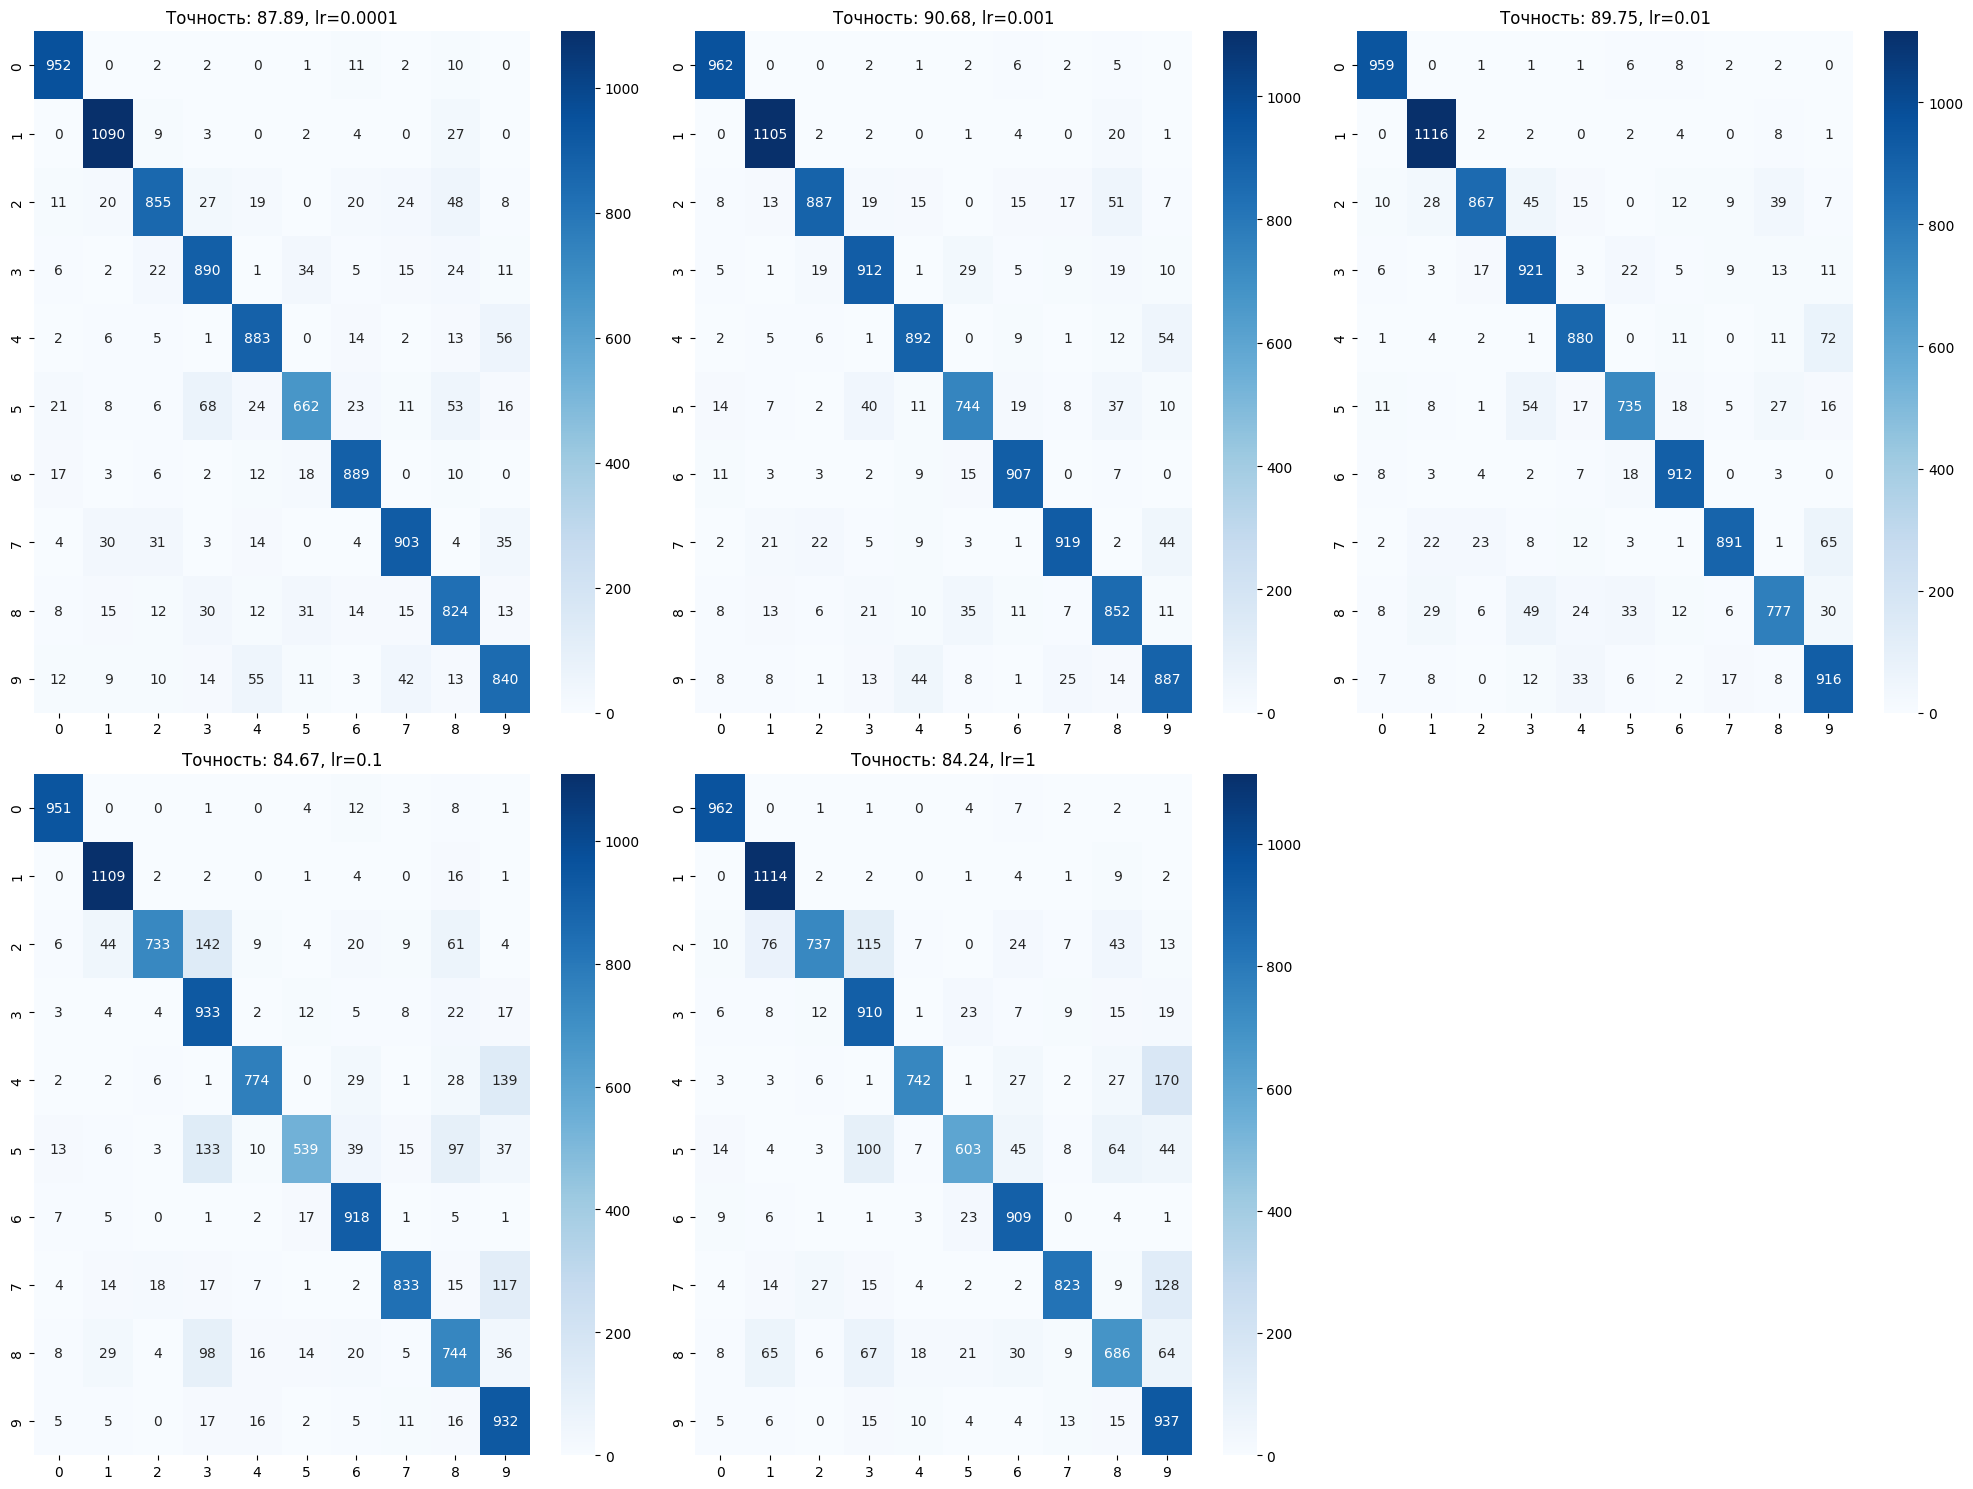

In [14]:
plt.figure(figsize=(20, 15))

for i, (accuracy, matrix, lr) in enumerate(acc_1, 1):
    plt.subplot(2, 3, i)  # 2 строки, 3 столбца, текущий индекс i
    sns.heatmap(matrix, annot=True, fmt='g', cmap='Blues')  # annot=True показывает значения в ячейках
    plt.title(f'Точность: {accuracy}, lr={lr}')  # Устанавливаем заголовок для каждого heatmap

plt.tight_layout()  # Автоматически корректирует подграфики, чтобы они не перекрывали друг друга
plt.show()  # Отображаем графики

In [15]:
acc_2 = []
for iterations_number in [1, 3, 5, 7, 10]:
    accuracy, matrix = algo(learning_rate=0.01, iterations_number=iterations_number)
    print()
    acc_2.append((accuracy, matrix, iterations_number))

Эпоха: 1

Эпоха: 1
Эпоха: 2
Эпоха: 3

Эпоха: 1
Эпоха: 2
Эпоха: 3
Эпоха: 4
Эпоха: 5

Эпоха: 1
Эпоха: 2
Эпоха: 3
Эпоха: 4
Эпоха: 5
Эпоха: 6
Эпоха: 7

Эпоха: 1
Эпоха: 2
Эпоха: 3
Эпоха: 4
Эпоха: 5
Эпоха: 6
Эпоха: 7
Эпоха: 8
Эпоха: 9
Эпоха: 10



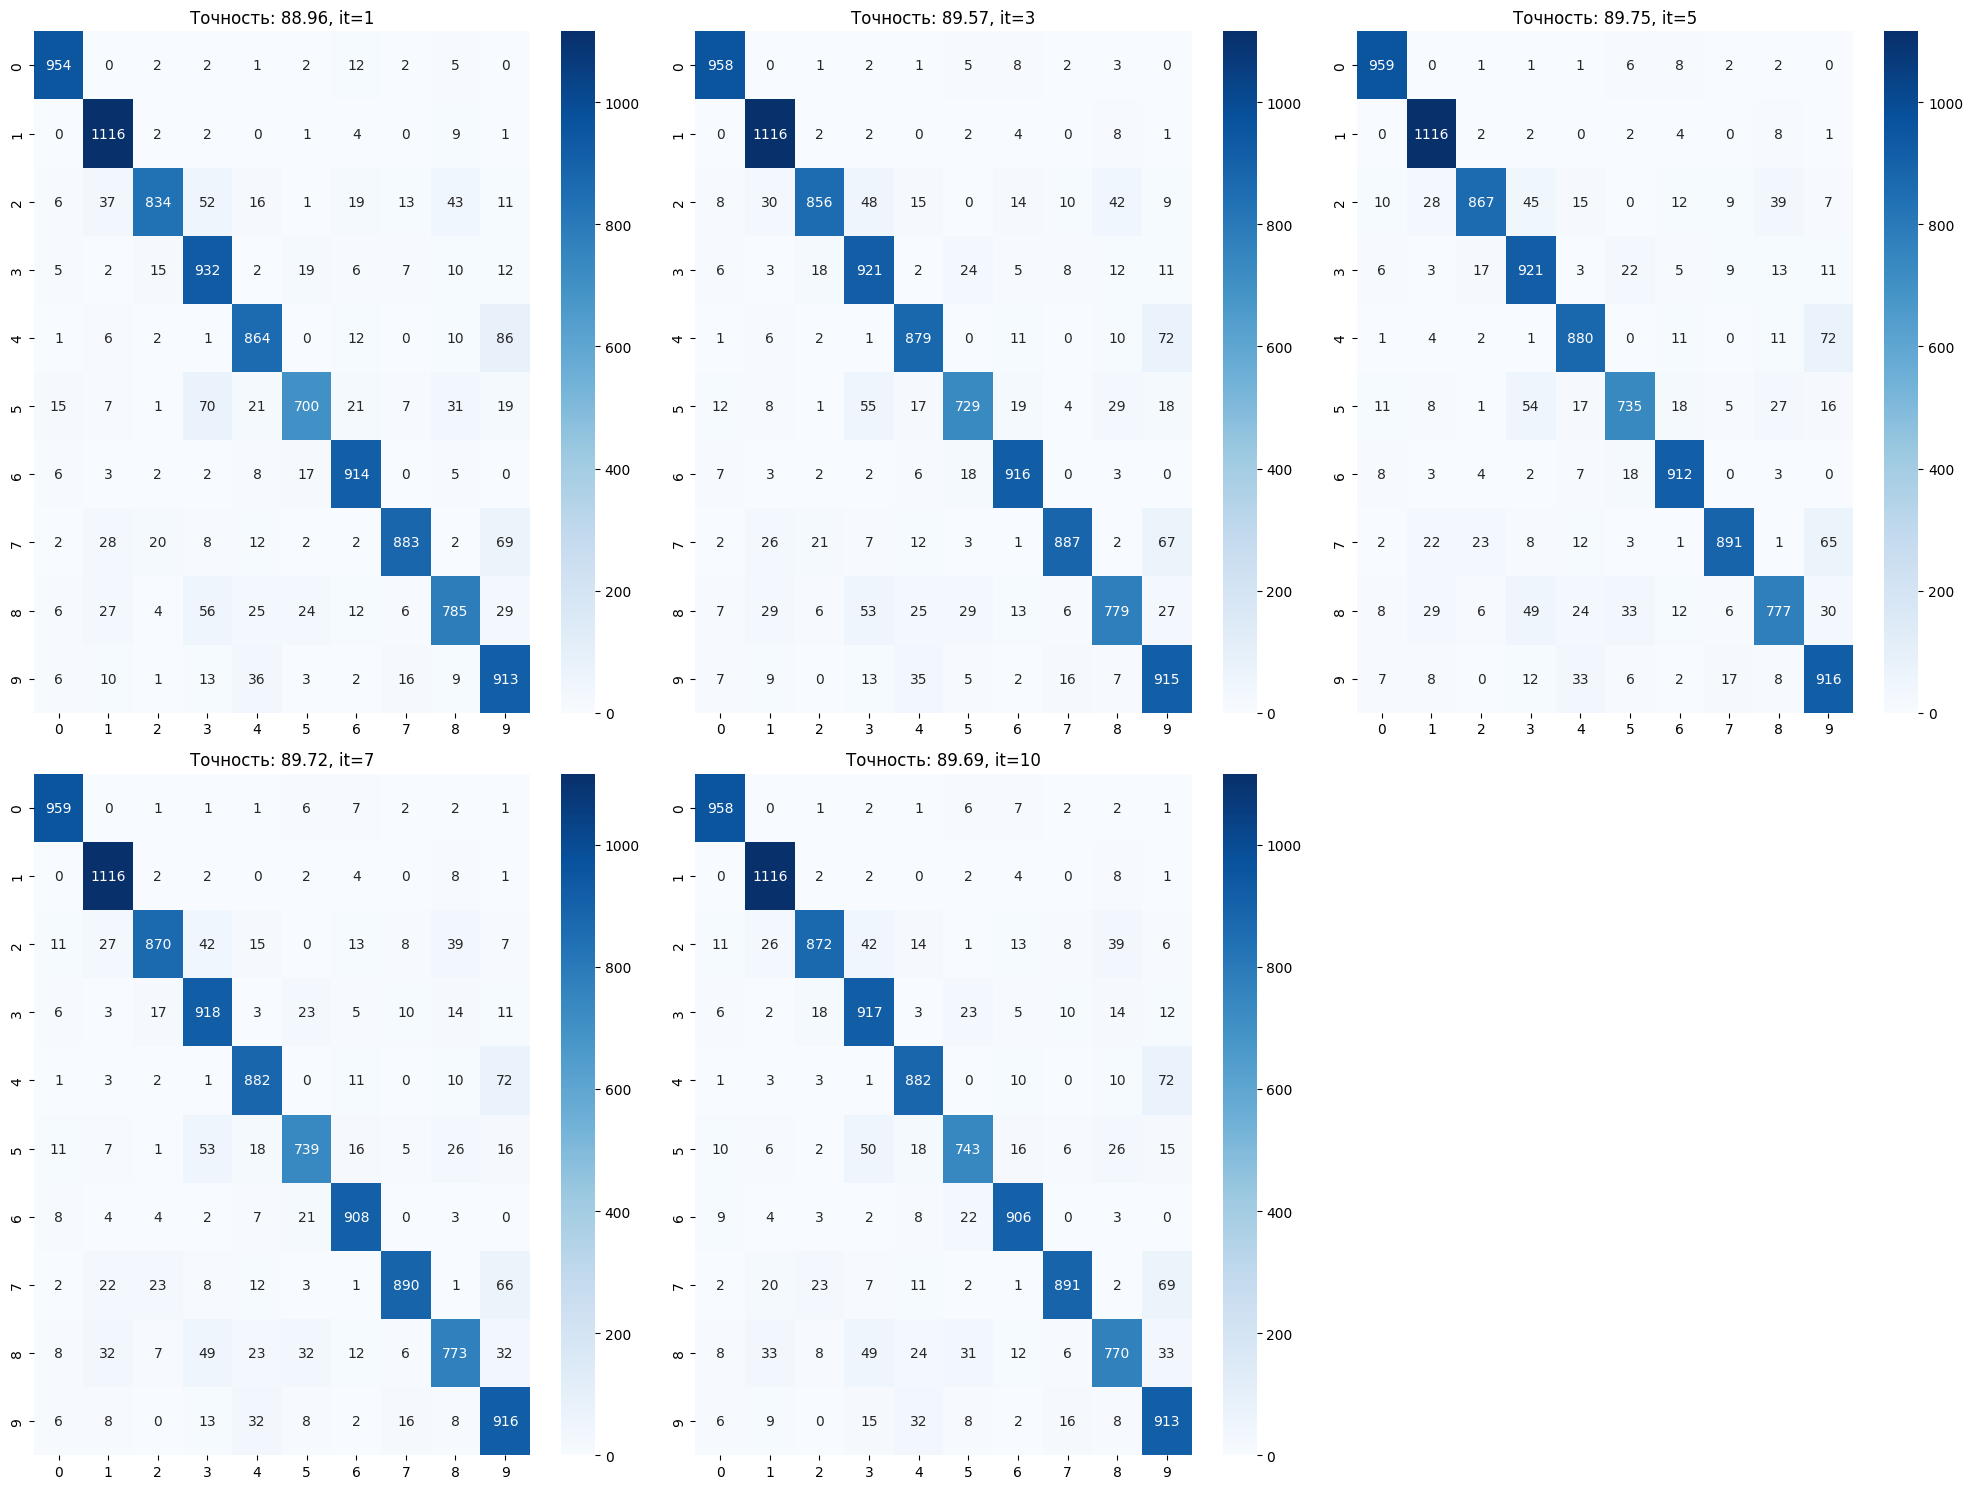

In [16]:
plt.figure(figsize=(20, 15))

for i, (accuracy, matrix, it) in enumerate(acc_2, 1):
    plt.subplot(2, 3, i)  # 2 строки, 3 столбца, текущий индекс i
    sns.heatmap(matrix, annot=True, fmt='g', cmap='Blues')  # annot=True показывает значения в ячейках
    plt.title(f'Точность: {round(accuracy, 2)}, it={it}')  # Устанавливаем заголовок для каждого heatmap

plt.tight_layout()  # Автоматически корректирует подграфики, чтобы они не перекрывали друг друга
plt.show()  # Отображаем графики